<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/Python_Data_Analysis_PART_IV_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Data Analysis - PART IV 
# Feature Engineering

C. Alex Hu @ *2021/06/14*

--------------------------------------------
**[ REFERENCE ]**
+ Danny Butvinik, Chief Data Scientist at NICE Actimize, **"Feature Selection – All You Ever Wanted To Know"**, KDnuggets, 2021/6/10. https://www.kdnuggets.com/2021/06/feature-selection-overview.html?fbclid=IwAR3kM12Dd9efZq_JL5nS7pljHFX7IXsFMLjUmjkxc-Iqw6J5I_x62q3DVh8

+ apporas, **"What is the difference between feature extraction and feature selection?"**, QuantDare, 2019/11/14. https://quantdare.com/what-is-the-difference-between-feature-extraction-and-feature-selection/

+ Benjamin Obi Tayo, PhD,  **"This Data Visualization is the First Step for Effective Feature Selection"**, KDnuggets, 2021/6/9. https://www.kdnuggets.com/2021/06/data-visualization-feature-selection.html?fbclid=IwAR3-pYSn3b2J-VsvMxAVd826_7_brIuJDyGp99rNxN0zMVVR9vvpgHYKcFE

+ **Wikipedia, "Feature selection"**, https://en.wikipedia.org/wiki/Feature_selection

+ **Scikit-Learn, "1.13. Feature selection"** 
https://scikit-learn.org/stable/modules/feature_selection.html

+ Richard Liang, **"Feature selection using Python for classification problems"**, Towards Data Science, 2019/8/7. https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028

+ Salem Alelyani, Jiliang Tang and Huan Liu, **"Feature Selection for Clustering: A Review"** http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.295.8115&rep=rep1&type=pdf

+ Raheel Shaikh, "**Feature Selection Techniques in Machine Learning with Python**," Towards Data Science
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

+ Jason Brownlee, **"How to Calculate Feature Importance With Python"**,  Machine Learning Mastery, 2020/8/20. https://machinelearningmastery.com/calculate-feature-importance-with-python/

+ Eryk Lewinson, "**Explaining Feature Importance by example of a Random Forest**," Towards Data Science
https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e 

+ **Scikit-Learn, "Feature importances with a forest of trees"** https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

+ Aditya Patkar, **"Let’s Learn Exploratory Data Analysis Practically"**, Towards Data Science, 2021/06/09. https://towardsdatascience.com/lets-learn-exploratory-data-analysis-practically-4a923499b779 

## CONTENT:

- [1. Introduction](#Introduction)
- [2. Feature Extraction by *Data Visualization*](#Feature_Extraction)
- [3. Feature Selection with `Scikit-Learn`](#Feature_Selection)
    + [3.1 Mobile Price dataset](#Mobile_Price_dataset)
        + [3.1.1 Exploratory Data Analysis (EDA)](#3_EDA)
        + [3.1.2 Feature Extraction for Mobile Price dataset](#3_Feature_Extraction)
    + [3.2 Feature Selection Methods](#Feature_Selection_Methods)
        + [3.2.1 Removing features with low variance](#low_variance)
        + [3.2.2 Univariate feature selection](#Univariate)
        + [3.2.3 Recursive feature elimination](#Recursive)
        + [3.2.4 Feature selection using `SelectFromModel`](#SelectFromModel)
            + [L1-based feature selection](#L1)
            + [Feature Importance](#Feature_Importance)
    + [3.3 Classification of `Mobile Price` Dataset](#Classification_of_Mobile_Price)
- [4. Feature Selection with Dimensionality Reduction](#Dimensionality_Reduction)
    + [4.1 Digit Recognition dataset](#Digit_Recognition_dataset)
    + [4.2 Feature Selection with `PCA`](#Feature_Selection_with_PCA)
    + [4.3 Classification of `Digit Recognition` Dataset](#Classification_of_Digit_Recognition)

<a id='Introduction'></a>
# 1. Introduction
>  + `Feature Engineering` consists of `Feature Extraction` and `Feature Selection`, which focuses on removing the redundant features and increasing the performance of the predictive models. 
>
>
>  + **Less redundant data means less noise; hence, higher the model accuracy and less the training time.**

+ ### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='Feature_Extraction'></a>
# 2. Feature Extraction by *Data Visualization*

>**1. The scatter pairplot by `seaborn.pairplot`()** 
>    - Plot pairwise relationships in a dataset. 

>      seaborn.pairplot(data, *, hue=None, hue_order=None, 
                       palette=None, vars=None, x_vars=None, 
                       y_vars=None, kind='scatter', 
                       diag_kind='auto', markers=None, 
                       height=2.5, aspect=1, corner=False, 
                       dropna=False, plot_kws=None, 
                       diag_kws=None, grid_kws=None, size=None)
>      
> - **[ Ref ]:** https://seaborn.pydata.org/generated/seaborn.pairplot.html

>**2. The correlation matrix by `pandas.DataFrame.corr`()** 
>    - Compute pairwise correlation of columns, excluding NA/null values.
              
>      [DataFrame].corr(method='pearson', min_periods=1)
>      
> - **[ Ref ]:** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


### [ Example 1 ]: `Iris` dataset with Pairplot & Correlation Matrix

+ ### Import `Iris` dataset

In [ ]:
iris_data = sns.load_dataset('iris')
iris_data.describe(include='all')

sepal_length  sepal_width  petal_length  petal_width species
count     150.000000   150.000000    150.000000   150.000000     150
unique           NaN          NaN           NaN          NaN       3
top              NaN          NaN           NaN          NaN  setosa
freq             NaN          NaN           NaN          NaN      50
mean        5.843333     3.057333      3.758000     1.199333     NaN
std         0.828066     0.435866      1.765298     0.762238     NaN
min         4.300000     2.000000      1.000000     0.100000     NaN
25%         5.100000     2.800000      1.600000     0.300000     NaN
50%         5.800000     3.000000      4.350000     1.300000     NaN
75%         6.400000     3.300000      5.100000     1.800000     NaN
max         7.900000     4.400000      6.900000     2.500000     NaN

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64


<AxesSubplot:xlabel='species', ylabel='count'>

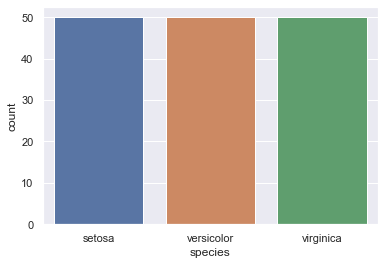

In [ ]:
print(pd.value_counts(iris_data["species"], sort=False))
sns.countplot(x = iris_data["species"])

In [ ]:
n_species = pd.concat([pd.Series(0, index=range(50)), 
                       pd.Series(1, index=range(50, 100)), 
                       pd.Series(2, index=range(100, 150))])
iris_data['n_species'] = n_species
iris_data

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     n_species  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
145          2  
146          2  
147          2  
148          2  
149          2  

[150 rows x 6 columns]

+ ### Pair Plots for the Features & the Target

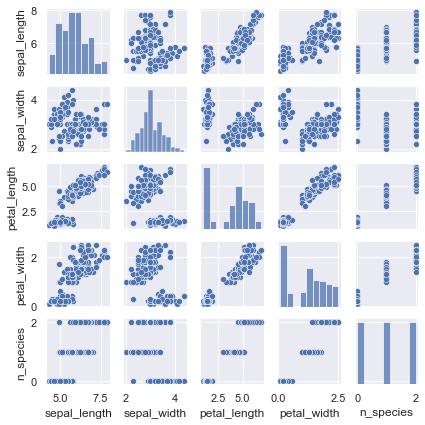

In [ ]:
sns.pairplot(iris_data, height=1.2);

---------------
> + **Linear-model plots with `seaborn.regplot`**
    + Plot data and a linear regression model fit.
    + **[ Ref ] :** https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot
    
> + **Computing linear-model coefficients with `scipy.stats.linregress`**
    + Calculate a linear least-squares regression for two sets of measurements.
    + **[ Ref ] :** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [ ]:
features = list(iris_data.columns[:4])
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

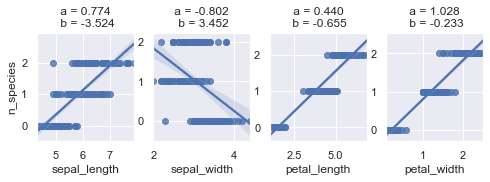

In [ ]:
import scipy

plt.figure(1, figsize=(8, 2))
for i, f in enumerate(features):
    coefficients = scipy.stats.linregress(x=iris_data[f], 
                                             y=iris_data['n_species'])
    plt.subplot(141+i)
    plt.title(' a = {0:.3f} \n b = {1:.3f}'.format(coefficients[0], 
                                                   coefficients[1]))
    sns.regplot(x=f, y='n_species', data=iris_data, 
               fit_reg=True).set(ylabel=None)
    if i==0: plt.ylabel('n_species');

+ ### Correlation Matrix with Heatmap

<AxesSubplot:>

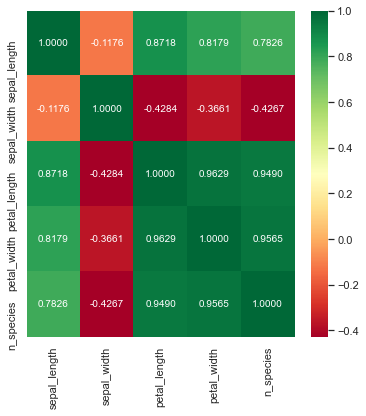

In [ ]:
# Correlation matrix for all features in Iris dataset
plt.figure(figsize=(6,6))
sns.heatmap(iris_data.corr(), annot=True, 
            annot_kws={"size": 10}, fmt=".4f", cmap="RdYlGn")

> **[NOTE]:**
> + **Correlation coefficients (`corr`) in [-1, 1]**
    + **`corr` > 0** : a `positive` correlation.
    + **`corr` < 0** : a `negative` correlation.
    
> + **abs(`corr`) > 0.7** : two features with `high` (positive/negative) correlation. 
> + **abs(`corr`) in (0.3, 0.7)**  : two features with `moderate` (positive/negative) correlation. 
> + **abs(`corr`) < 0.3** : two features with `low` (positive/negative) correlation. 
> + **abs(`corr`) ~ 0** : two features with `no` correlation. 

<a id='Feature_Selection'></a>
# 3. Feature Selection with `Scikit-Learn`

>**Feature Selection Methods** 
> + **Removing features with low variance**
> + **Univariate feature selection**
> + **Recursive feature elimination**
> + **Feature selection using SelectFromModel**
    + **L1-based feature selection**
    + **Feature Importance**

> **[ Ref ]:** Scikit-Learn, **`1.13. Feature selection`**, 
 https://scikit-learn.org/stable/modules/feature_selection.html

<a id='Mobile_Price_dataset'></a>
## 3.1 Mobile Price dataset
+ **[Ref]:** Kaggle dataset : **`Mobile Price Classification - classify mobile price range`**, https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv 

> + **[Download dataset from Github]:** https://raw.githubusercontent.com/abhinav23dixit/Mobile-Price-Classification/master/train.csv
>
>
> + **[Data Description]: refer to [Ref] link.**
>
>
+ **[NOTE] :** 

    + Instead of predicting the actual prices, you only need to predict a price range which classifies the mobile prices into 4 different categories from low to high.
    
    + **`price_range`** : the target variable, with value of 
        - `0 (low cost)`
        - `1 (medium cost)`
        - `2 (high cost)`
        - `3 (very high cost)`

In [ ]:
url = 'https://raw.githubusercontent.com/abhinav23dixit/Mobile-Price-Classification/master/train.csv'
mobile_data = pd.read_csv(url)
mobile_data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

<a id='3_EDA'></a>
### 3.1.1 Exploratory Data Analysis (EDA)

In [ ]:
mobile_data.describe(include='all').T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [ ]:
X = mobile_data.drop('price_range', axis=1)  # X = mobile_data.iloc[:,0:20] : feature matrix
y = mobile_data['price_range']               # y = mobile_data.iloc[:,-1]   : target vector
X.shape, y.shape

((2000, 20), (2000,))

+ ### Normalization

In [ ]:
y  # price range

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64


<AxesSubplot:xlabel='price_range', ylabel='count'>

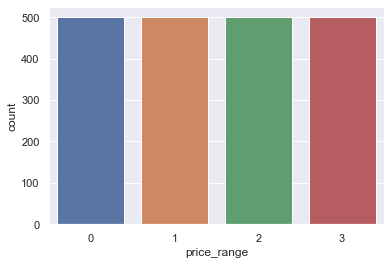

In [ ]:
print(y.value_counts())
sns.countplot(x = y)

<a id='3_Feature_Extraction'></a>
### 3.1.2 Feature Extraction for Mobile Price dataset
 + Feature Extraction for Mobile Price dataset by `data visualization`:
     + `Pair plots`
     + `Correlation matrix`

+ #### Pair plots

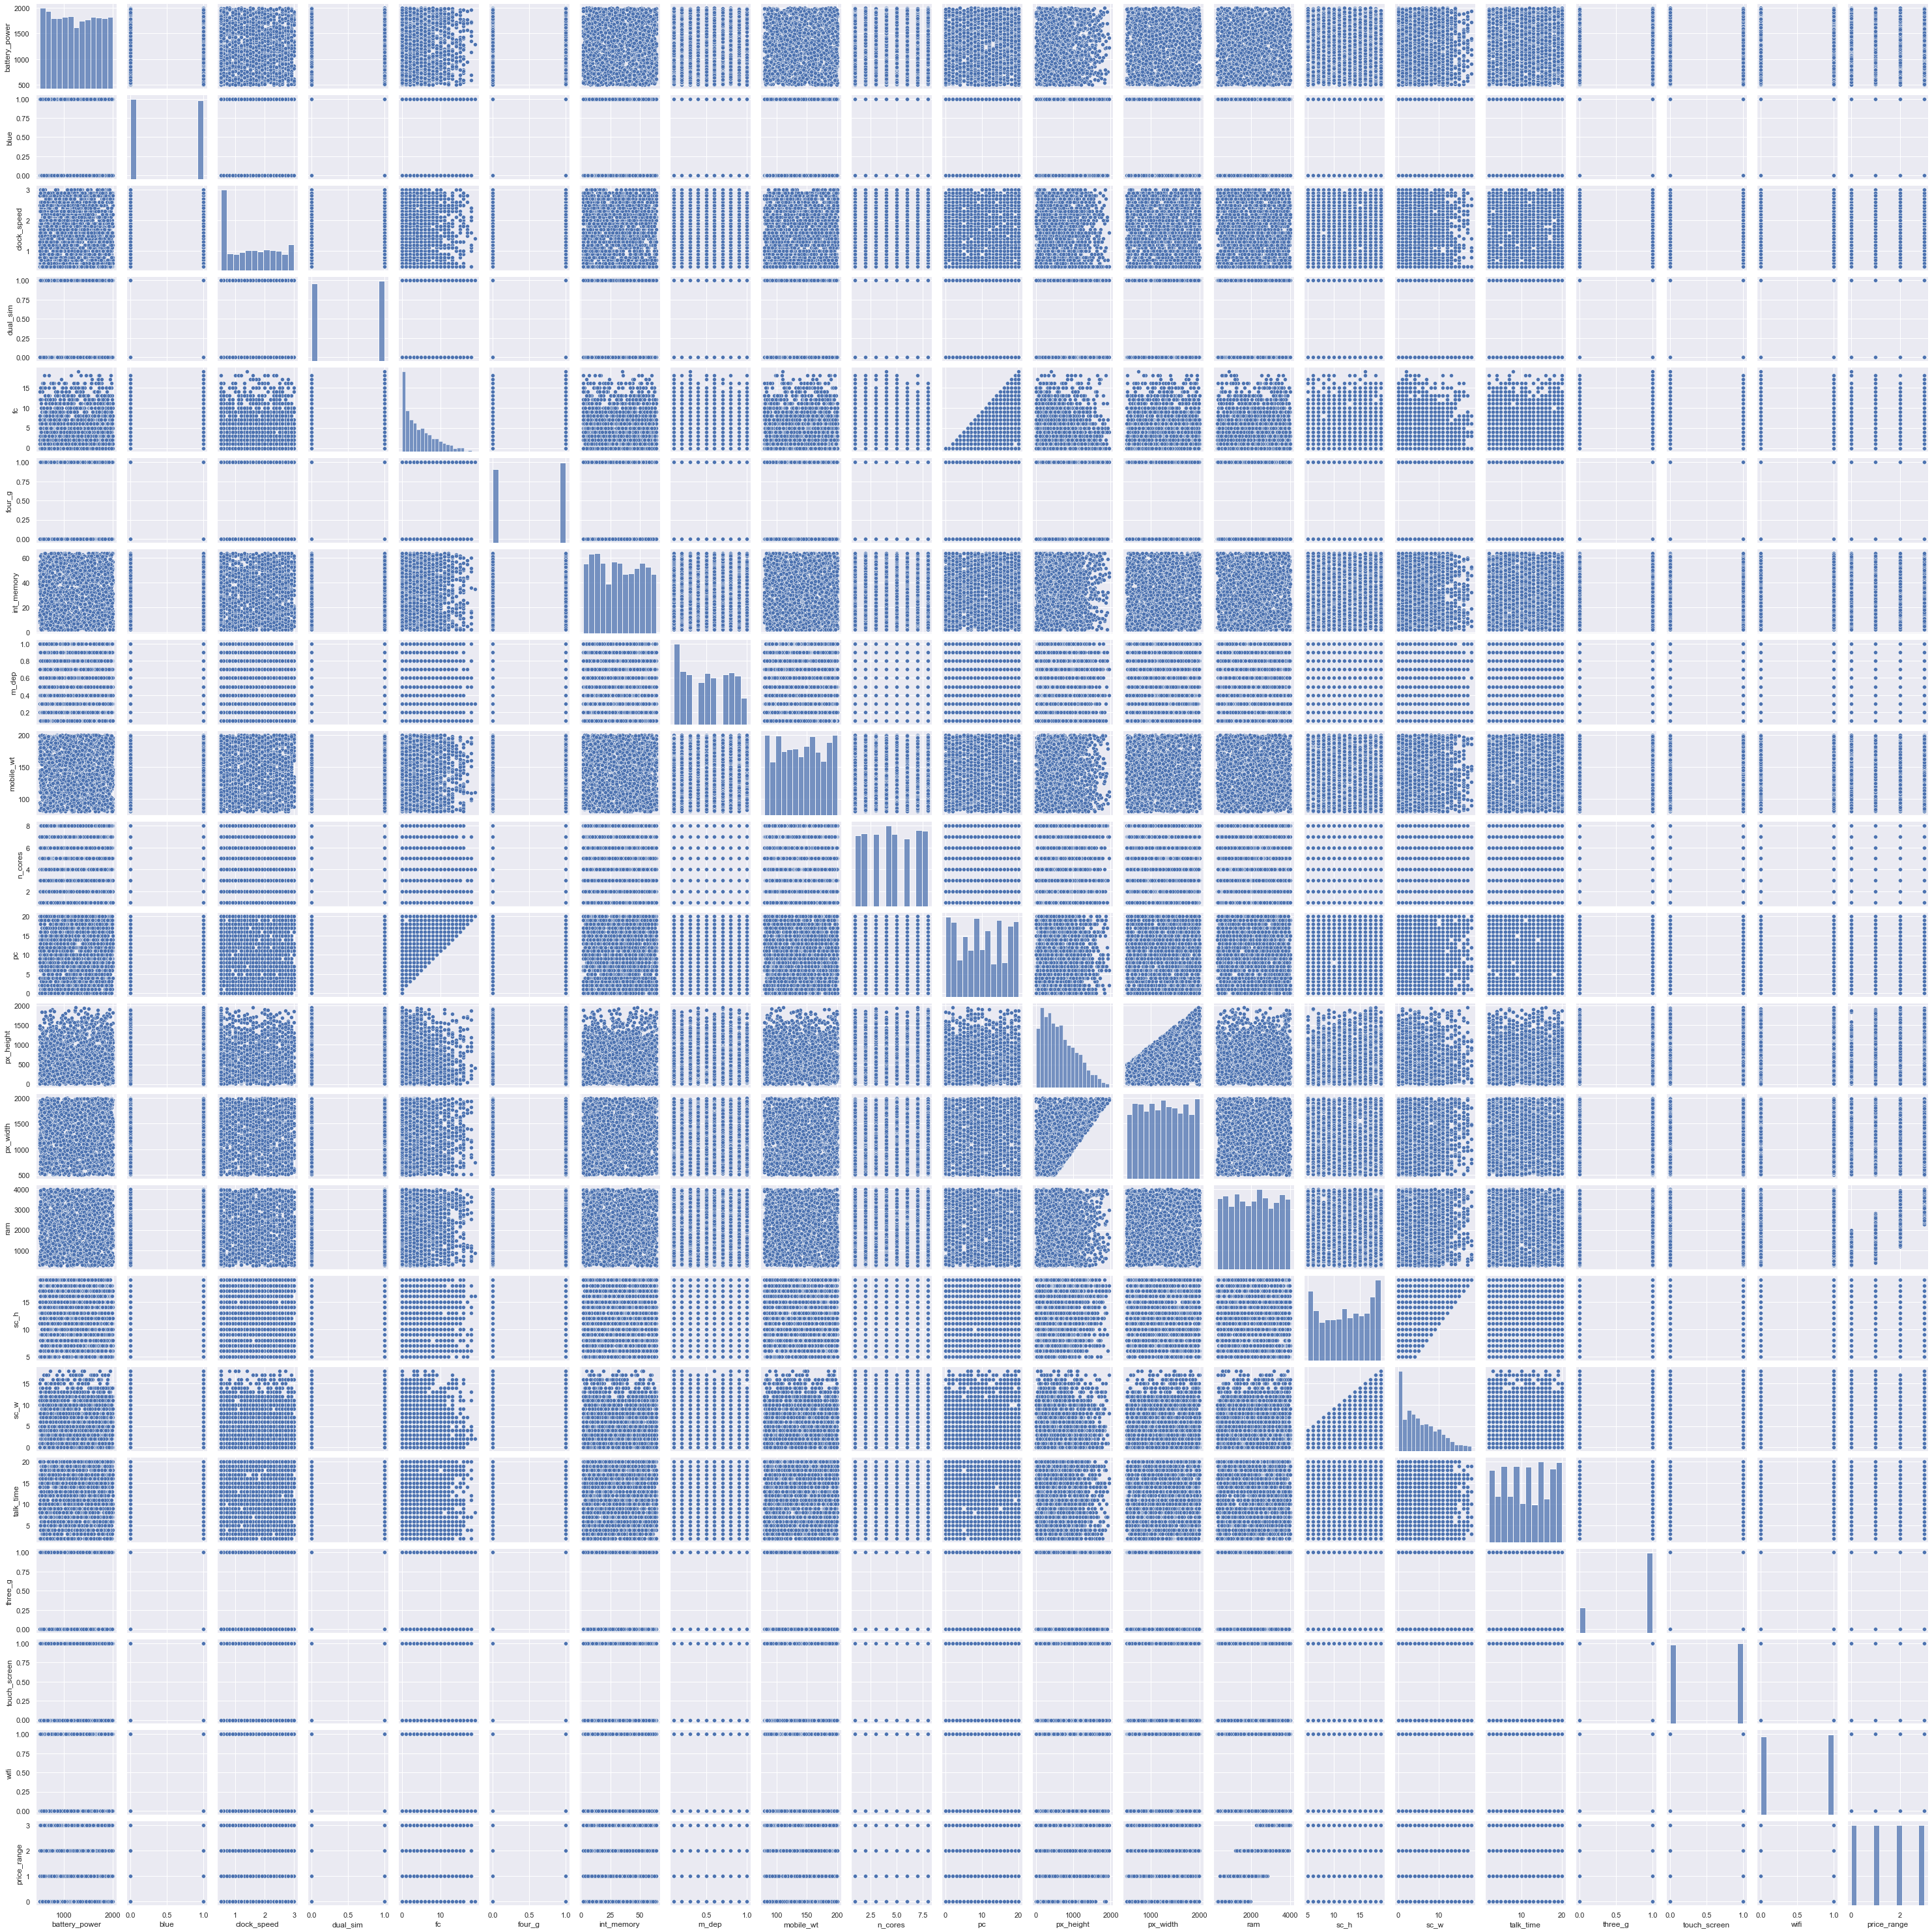

In [ ]:
# NOTE: It might take 2 ~ 3 minutes to compute and plot the result on PC.
sns.pairplot(mobile_data, height=2.0)

+ #### Correlation matrix with Heatmap

<AxesSubplot:>

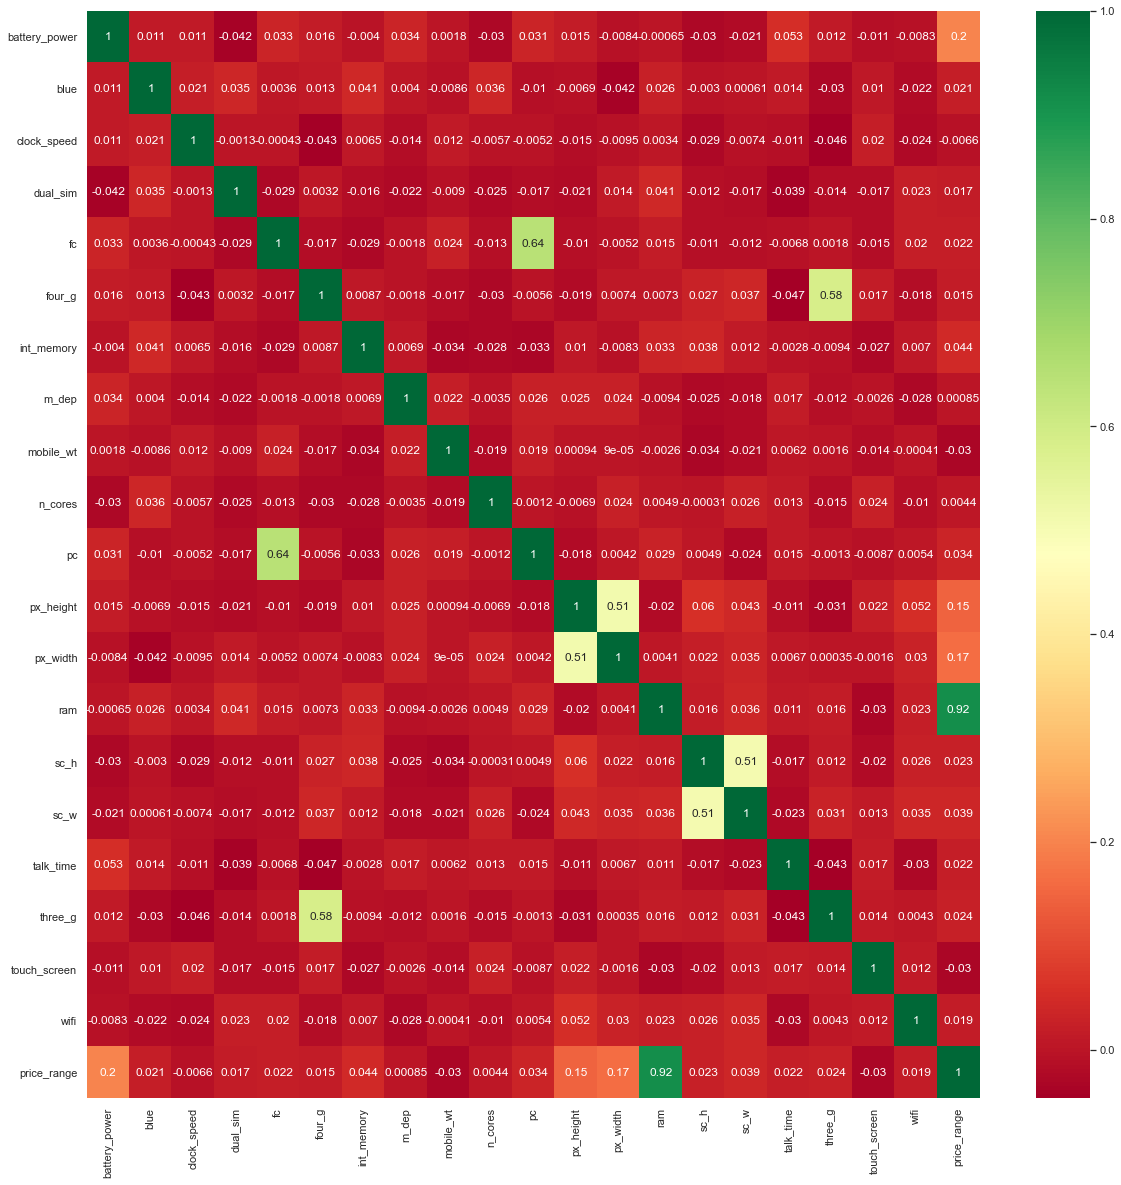

In [ ]:
# Correlation matrix for all features in Mobile Price dataset
plt.figure(figsize=(20,20))
sns.heatmap(mobile_data.corr(),    # Heat map for correlation matrix
            annot=True,cmap="RdYlGn")

-------------------
**< Summary > :** 
+ From both the pair plot and the correlation matrix, it seems that the target, `price_range`, is highly correlated only with the feature, `RAM`, and irrelevant to the rest.
+ *Hence, we need more information for the further feature selection.*
-------------------

<a id='Feature_Selection_Methods'></a>
## 3.2 Feature Selection Methods

> + **[Ref]:** Scikit-Learn, **`1.13. Feature selection`** :  https://scikit-learn.org/stable/modules/feature_selection.html

<a id='low_variance'></a>
### 3.2.1 Removing features with low variance

    class sklearn.feature_selection.VarianceThreshold(threshold=0.0)

> + `sklearn.feature_selection.VarianceThreshold` - Feature selector that removes all low-variance features.
>
>
> + It's **`a simple baseline approach`** to feature selection, which removes all features whose variance doesn’t meet some threshold.  
>
>
> + The variance of the feature variables is given by $Var[X] = p*(1-p)$.
>
>
> + By default, it removes all zero-variance features, i.e. features that have the same value in all samples.
>
>
> + **[Ref]: `sklearn.feature_selection.VarianceThreshold`** :  https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))  # p = 0.8
X_remove_variance = sel.fit_transform(X)
X_remove_variance.shape

(2000, 19)

In [ ]:
sel.get_params()  #  threshold value

{'threshold': 0.15999999999999998}

In [ ]:
sel.get_support()  # Get a mask, or integer index, of the features selected

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

+ **The features been removed :**

In [ ]:
X.columns[~sel.get_support()]  # The features been removed

Index(['m_dep'], dtype='object')

+ **The features remained :**

In [ ]:
X.columns[sel.get_support()]   # The features remained

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
       'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'],
      dtype='object')

---------------------
**< Summary > :** 
+ **`Removing features with low variance`** is  *`a simple baseline approach`* to feature selection.

---------------------

<a id='Univariate'></a>
### 3.2.2 Univariate feature selection
 
> + **Statistical tests can be used to select those `features` that have the strongest relationship with the `target` variable.**
>
>
> + The scikit-learn library provides the following classes with a set of different statistical tests to do feature selection:
    + **`SelectKBest`** - removing all but the *k* highest scoring features.
    + **`SelectPercentile`** - Selecting features according to a percentile of the highest scores.
    + Other univariate methods include `SelectFpr`, `SelectFdr`, `SelectFwe`, and `GenericUnivariateSelect`. 
>
>
> + The most often used statistical tests include :
    + For classification : 
        + **`chi-squared (chi²) statistical test`** - Computing chi-squared stats between each non-negative feature and class. 
        + **`F-test` : `f_classif`** - Computing the ANOVA F-value for the provided sample.
        + **`mutual_info_classif`** - Estimate mutual information for a discrete target variable.
    + For classification : 
        + `F-test` : `f_regression` - Univariate linear regression tests.
        + `mutual_info_regression` : Estimate mutual information for a continuous target variable.

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

##  Selecting Top 10 Best Features using SelectKBest class
kc = SelectKBest(score_func=chi2, k=10)
kf = SelectKBest(score_func=f_classif, k=10)
km = SelectKBest(score_func=mutual_info_classif, k=10)

kc_fit = kc.fit(X,y)
kf_fit = kf.fit(X,y)
km_fit = km.fit(X,y)

kc_scores = pd.DataFrame(kc_fit.scores_)  # Scores of features.
kf_scores = pd.DataFrame(kf_fit.scores_)  # Scores of features.
km_scores = pd.DataFrame(km_fit.scores_)  # Scores of features.
X_columns = pd.DataFrame(X.columns)

# Combine dataframes ... 
featureScores = pd.concat([X_columns, kc_scores, kf_scores, km_scores], axis=1)
# Naming the dataframe's columns ...
featureScores.columns = ['Specs', 'chi2_Scores', 'f-test_Scores', 
                         'mutual_info_scores'] 
featureScores

Specs    chi2_Scores  f-test_Scores  mutual_info_scores
0   battery_power   14129.866576      31.598158            0.029509
1            blue       0.723232       0.476768            0.000000
2     clock_speed       0.648366       0.493708            0.013546
3        dual_sim       0.631011       0.428239            0.006592
4              fc      10.135166       0.772182            0.000000
5          four_g       1.521572       1.059525            0.000000
6      int_memory      89.839124       2.922996            0.011843
7           m_dep       0.745820       1.500682            0.000000
8       mobile_wt      95.972863       3.594318            0.000000
9         n_cores       9.097556       2.625415            0.000000
10             pc       9.186054       0.825446            0.002102
11      px_height   17363.569536      19.484842            0.027341
12       px_width    9810.586750      22.620882            0.026437
13            ram  931267.519053    3520.110824            0.846997
14           sc_h       9.614878       2.225984            0.004894
15           sc_w      16.480319       1.671000            0.012289
16      talk_time      13.236400       1.628811            0.002420
17        three_g       0.327643       0.457320            0.002448
18   touch_screen       1.928429       1.293302            0.000000
19           wifi       0.422091       0.284940            0.000000

+ **List 10 best features ...**

<Figure size 720x1440 with 0 Axes>

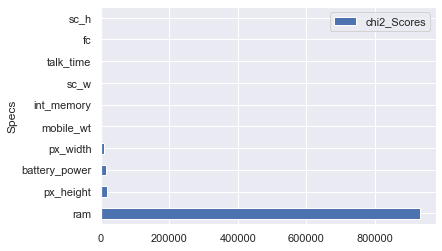

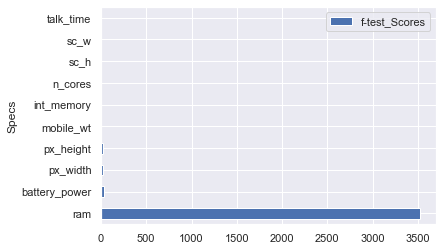

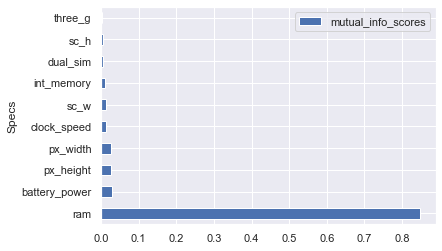

In [ ]:
plt.figure(1, figsize=(10, 20))
for i in range(3):
    # plt.subplot(131+i)
    fs = featureScores.columns[i+1]
    best_features = featureScores.nlargest(10, fs)[['Specs', fs]]
    best_features.plot.barh('Specs');   # pands plot()

---------------------
**< Summary > :** 
+ Accordingly, the **Univariate feature-selection** method, `SelectKBest`, with `chi-squared (chi²)`, `f-test` and `mutual info` statistical tests, show that 4 featutres, i.e., *`ram`, `px_height`, `battery_power` and `px_width`*, might be suitable to the target, `price_range`, for modeling.

+ *Of course, we can try different Univariate feature-selection methods with varied statistical tests to compare the scores results.*

---------------------

<a id='Recursive'></a>
### 3.2.3 Recursive feature elimination

    class sklearn.feature_selection.RFE(estimator, *, n_features_to_select=None, 
                                        step=1, verbose=0, importance_getter='auto')
                                        
> + `sklearn.feature_selection.RFE` - Feature ranking with recursive feature elimination.
>
>
> + Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of `recursive feature elimination` (`RFE`) is to select features by recursively considering smaller and smaller sets of features.  
>
>
> + The least important features are pruned recursively until the desired number of features is eventually reached and hence selected.
>
>
> + **[Ref]: `sklearn.feature_selection.RFE`** : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=100, n_estimators=50)

rfe_model = RFE(rfc, n_features_to_select = 4, # Select 4 features (What about 10?)
                step = 1)  # step = 1 : remove one at a time
rfe = rfe_model.fit(X, y.astype('int'))
rfe.support_   # rfe.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False])

In [ ]:
rfe.ranking_  # Selected (i.e., estimated best) features are assigned rank 1.

array([ 1, 16,  7, 14,  9, 12,  3, 10,  2, 11,  5,  1,  1,  1,  8,  6,  4,
       17, 13, 15])

In [ ]:
X.columns[rfe.support_]   # X.columns[rfe.ranking_ == 1]

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')

In [ ]:
X[X.columns[rfe.ranking_ == 1]]

battery_power  px_height  px_width   ram
0               842         20       756  2549
1              1021        905      1988  2631
2               563       1263      1716  2603
3               615       1216      1786  2769
4              1821       1208      1212  1411
...             ...        ...       ...   ...
1995            794       1222      1890   668
1996           1965        915      1965  2032
1997           1911        868      1632  3057
1998           1512        336       670   869
1999            510        483       754  3919

[2000 rows x 4 columns]

---------------------
**< Summary > :** 
+ By setting `n_features_to_select` = 4, the **Recurssive Feature Elimination (RFE)** method with `RandomForestClassifier`, return the 4 featutres, i.e., *`ram`, `px_height`, `battery_power` and `px_width`* same as the previous result in **Univariate feature selection**.

---------------------

<a id='SelectFromModel'></a>
### 3.2.4 Feature selection using `SelectFromModel`

    class sklearn.feature_selection.SelectFromModel(estimator, *, threshold=None, 
                                                    prefit=False, norm_order=1, 
                                                    max_features=None, 
                                                    importance_getter='auto')
                                                    
> + `sklearn.feature_selection.SelectFromModel` - Meta-transformer for selecting features based on importance weights.
>
>
> + `SelectFromModel` can be used with any estimator that assigns importance to each feature through a specific attribute (such as `coef_`, `feature_importances_`) or via an `importance_getter` callable after fitting.  
>
>
> + Along with the `threshold` criteria which determine if the feature selection or not, we can use the `max_features` parameter to set a limit on the number of features to select.
>
>
> + **[Ref]: `sklearn.feature_selection.SelectFromModel`** : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel

<a id='L1'></a>
+ ### L1-based feature selection

> + Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. 
>
>
> + When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with `SelectFromModel` to select the non-zero coefficients. 

In [ ]:
from sklearn.svm import LinearSVC  # Linear Support Vector Classification
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.001, penalty="l1", dual=False)
lsvc_model = SelectFromModel(lsvc).fit(X, y)
X_lsvc = lsvc_model.transform(X)
X_lsvc.shape

(2000, 9)

In [ ]:
# Features whose importance is greater or equal to the threshold 
# are kept while the others are discarded.
lsvc_model.threshold_  # penalty="l1" : threshold = 0.00001 (1e-5)

1e-05

In [ ]:
lsvc_model.get_support()

array([ True, False, False, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False, False])

In [ ]:
list(X.columns[lsvc_model.get_support()])

['battery_power',
 'int_memory',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'talk_time']

---------------------
**< Summary > :** 
+ 9 features have been selected by the `SelectFromModel` meta-transformer with the L1-based `linearSVC` estimator.

---------------------

<a id='Feature_Importance'></a>
+ ### Feature Importance

> + **Feature importances are provided by the fitted attribute `feature_importances_` in Tree-based estimators.**
>
>
> + They are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
>
>
> + **Feature importance** gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
>
>
> + We will use the following tree-based classifiers for `Mobile Price` dataset:
    1. **`Decision Tree Classifier`**
    2. **`Random Forests Classifier`**
    3. **`Extra Tree Classifier`**

> **[Ref]:**
> + **`sklearn.tree`** : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
> + **`feature_importances_`** : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_

DecisionTree > feature importances : 
 [0.10197005 0.         0.00305714 0.00426667 0.00157778 0.00088889
 0.00833261 0.00835287 0.01888553 0.00517676 0.00800935 0.08614982
 0.09100773 0.64264206 0.00673205 0.00526575 0.00506273 0.00191111
 0.         0.00071111]


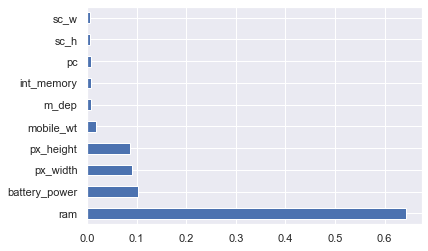

RandomForest > feature importances : 
 [0.07593774 0.00643251 0.0268282  0.00676052 0.02427497 0.00617773
 0.0361188  0.0233359  0.03764095 0.02309504 0.02780742 0.05623634
 0.05545931 0.49344209 0.02618097 0.02669098 0.02962112 0.00511431
 0.00661113 0.00623397]


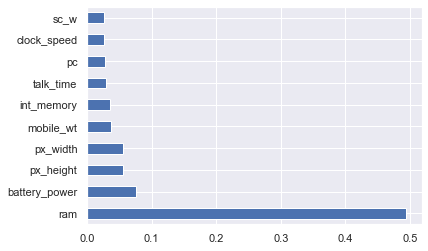

ExtraTrees > feature importances : 
 [0.06243543 0.0189919  0.03330591 0.01992821 0.03245906 0.01719873
 0.035245   0.03380226 0.03723977 0.03433146 0.03271832 0.0472318
 0.04866661 0.39023514 0.03408988 0.03385234 0.03518137 0.01420935
 0.01859533 0.02028213]


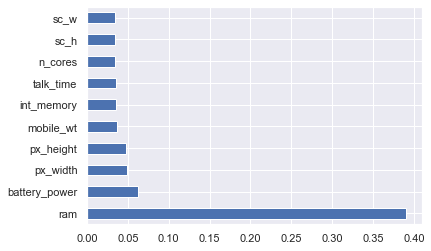

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

model = [DecisionTreeClassifier(), 
         RandomForestClassifier(n_estimators=100),
         ExtraTreesClassifier(n_estimators=100)]

model = [model[i].fit(X,y) for i in range(len(model))]

num_chr = [12, 12, 10]
# Use the inbuilt feature_importances_ of tree-based classifiers
# to plot graphs of feature importances for data visualization
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ' > feature importances : \n', 
          model[i].feature_importances_) 
    feat_importances = pd.Series(model[i].feature_importances_, 
                                 index=X.columns)
    feat_importances.nlargest(10).plot.barh()
    # plt.xlim(0, 0.7)
    plt.show()

---------------------
**< Summary > :** 
+ By comparing the **feature importance** results from 3 different tree-based estimators above, it turns out that the 4 featutres, *`ram`, `px_height`, `battery_power` and `px_width`* could be adopted for machine learning.

---------------------

<a id='Classification_of_Mobile_Price'></a>
## 3.3 Classification of `Mobile Price` Dataset

In [ ]:
X.columns  # the original features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

+ ### 4 selected features

In [ ]:
# 4 selected features
X_features = X[['ram', 'battery_power', 'px_height', 'px_width']]
X_features

ram  battery_power  px_height  px_width
0     2549            842         20       756
1     2631           1021        905      1988
2     2603            563       1263      1716
3     2769            615       1216      1786
4     1411           1821       1208      1212
...    ...            ...        ...       ...
1995   668            794       1222      1890
1996  2032           1965        915      1965
1997  3057           1911        868      1632
1998   869           1512        336       670
1999  3919            510        483       754

[2000 rows x 4 columns]

+ ### Normalization

In [ ]:
# z-score Standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Xn = standard_scaler.fit_transform(X_features)

+ ### Training Data vs. Test Data

In [ ]:
# Split the dataset with 85% for training data
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(Xn, y, random_state=0,
                                  train_size=0.85, test_size=0.15)

+ ### 4 Training Models for Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
model = [LogisticRegression(random_state=1),
         DecisionTreeClassifier(random_state=1), 
         RandomForestClassifier(n_estimators=200, random_state=1),
         ExtraTreesClassifier(n_estimators=100, random_state=1)]

model = [model[i].fit(X1,y1) for i in range(len(model))]
pred  = [model[i].predict(X2) for i in range(len(model))]

+ ### Accuracy Scores

In [ ]:
from sklearn.metrics import accuracy_score
acc = [accuracy_score(y2, pred[i]) for i in range(len(model))]

num_chr = [12, 12, 12, 10]
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i]) 

LogisticRegr: 	 0.9566666666666667
DecisionTree: 	 0.8633333333333333
RandomForest: 	 0.92
ExtraTrees: 	 0.9233333333333333


+ ### Confusion Matrices

LogisticRegr: 	 0.9566666666666667
DecisionTree: 	 0.8633333333333333
RandomForest: 	 0.92
ExtraTrees: 	 0.9233333333333333


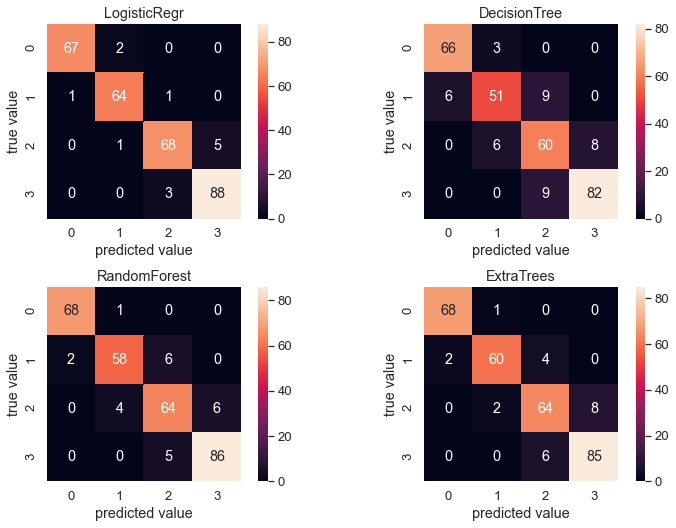

In [ ]:
n_clf = len(model)
clfs = [str(model[i])[:num_chr[i]] 
                    for i in range(n_clf)]

# Compute the confusion matrix...
from sklearn.metrics import confusion_matrix
mat = [confusion_matrix(y2, pred[i]) for i in range(n_clf)]

# Plot the confusion matrix as a color-encoded matrix...
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.35, wspace=0.1)

# plot the confusion matrices
for i in range(n_clf):
    sns.set(font_scale=1.2)
    fig.add_subplot(3, n_clf//2, i + 1, xticks=[], yticks=[])
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i])
    sns.heatmap(mat[i], square=True, annot=True, cbar=True)
    plt.ylim(4, 0)
    plt.title(clfs[i])
    plt.xlabel('predicted value')
    plt.ylabel('true value');

<a id='Dimensionality_Reduction'></a>
# 4. Feature Selection with Dimensionality Reduction

> + For machine learning, most `Feature Selection` methods focus on how to select a useful subset of the original features while `Dimensionality Reduction` transforms the original features into a lower-dimension dataset.
>
>
> + `Dimensionality Reduction` could be useful for downsizing the sparse matrix of features, such as the case of the `hand-written digit recognition dataset`, in order to increase the performance of the estimators in both accuracy and computing speed.
>
>
> + In the following example, `Principal Component Analysis (PCA)` will be employed for dimensionality reduction.

> **[Ref]:**
> + **`sklearn.decomposition.PCA`** : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


<a id='Digit_Recognition_dataset'></a>
## 4.1 Digit Recognition dataset from `sklearn`

>+ Total : 1797 samples (for 10 classes of hand-written digits).
>+ Each sample is a 8x8 image of a hand-written digit.
>

 + **`sklearn.datasets.load_digits`** - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html?highlight=digits%20dataset#sklearn.datasets.load_digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

<a id='EDA_for_Digit_Recognition'></a>
+ ###  EDA for Digit Recognition

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
X_digits = pd.DataFrame(digits.data)  # 64 (8x8) feature variables
X_digits.shape

(1797, 64)

In [ ]:
# 10 labeled classes - digits : 0 ~ 9 
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
y_digits = pd.Series(digits.target)
y_digits.shape

(1797,)

Text(0, 0.5, 'Numbers of Images')

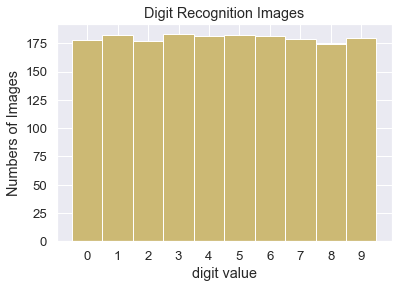

In [ ]:
plt.hist(y_digits, range = (-0.5, 9.5), color='y')
plt.xticks(np.arange(0, 10, step=1))
plt.title('Digit Recognition Images')
plt.xlabel("digit value")
plt.ylabel("Numbers of Images")

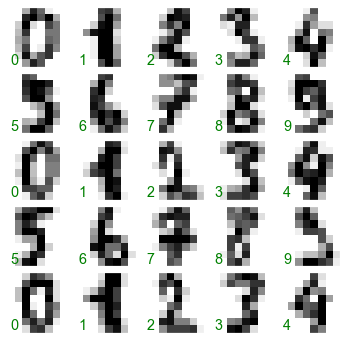

In [ ]:
_, axes = plt.subplots(5, 5, figsize=(6, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

+ ### Normalization

In [ ]:
##  Features including 1797 samples and 64 variables
X_digits.describe(include='all').T 

count       mean       std  min   25%   50%   75%   max
0   1797.0   0.000000  0.000000  0.0   0.0   0.0   0.0   0.0
1   1797.0   0.303840  0.907192  0.0   0.0   0.0   0.0   8.0
2   1797.0   5.204786  4.754826  0.0   1.0   4.0   9.0  16.0
3   1797.0  11.835838  4.248842  0.0  10.0  13.0  15.0  16.0
4   1797.0  11.848080  4.287388  0.0  10.0  13.0  15.0  16.0
..     ...        ...       ...  ...   ...   ...   ...   ...
59  1797.0  12.089037  4.374694  0.0  11.0  13.0  16.0  16.0
60  1797.0  11.809126  4.933947  0.0  10.0  14.0  16.0  16.0
61  1797.0   6.764051  5.900623  0.0   0.0   6.0  12.0  16.0
62  1797.0   2.067891  4.090548  0.0   0.0   0.0   2.0  16.0
63  1797.0   0.364496  1.860122  0.0   0.0   0.0   0.0  16.0

[64 rows x 8 columns]

In [ ]:
max(X_digits.max())

16.0

In [ ]:
# Feature dataset normalized with the maximum value
Xn = X_digits / max(X.max())
max(Xn.max())

0.00400200100050025

<a id='Feature_Selection_with_PCA'></a>
## 4.2 Feature Selection with `PCA`

Text(0, 0.5, '% of variance explained')

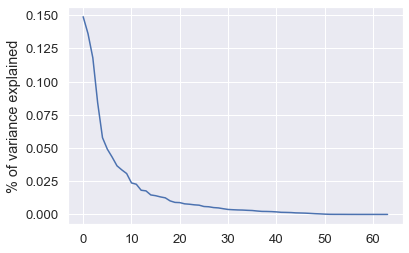

In [ ]:
from sklearn.decomposition import PCA

## PCA decomposition
pca = PCA(n_components=64) 
pca.fit(Xn)

# Percentage of variance explained 
# by each of the selected components.
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')

In [ ]:
# Graph reaches asymptote at around 40... 
pca = PCA(n_components=40) 
pca.fit(Xn)
X_pca = pd.DataFrame(pca.transform(Xn))
X_pca

0         1         2         3         4             5   \
0    -0.000315  0.005321 -0.002367  0.003255 -0.001783 -1.861095e-03   
1     0.001990 -0.005195  0.001110 -0.003725  0.001475 -1.622217e-03   
2     0.001749 -0.002490  0.000740 -0.003074 -0.004534 -1.127480e-03   
3    -0.003979  0.000834  0.002457 -0.003070  0.001742  2.725070e-04   
4     0.005830  0.001068 -0.001419 -0.003465 -0.000090 -7.147510e-04   
...        ...       ...       ...       ...       ...           ...   
1792 -0.003653  0.003338 -0.003361 -0.001627  0.000947 -6.828034e-04   
1793  0.001617  0.005144 -0.002290  0.003140 -0.002255 -3.428501e-03   
1794  0.002702 -0.001741  0.001401 -0.001808 -0.000865 -3.095349e-03   
1795 -0.001219  0.003108 -0.002544 -0.001668  0.000893 -9.746657e-07   
1796 -0.000086  0.001592  0.002695 -0.001933 -0.000828 -7.626472e-04   

            6         7         8         9   ...        30        31  \
0     0.000814  0.000639 -0.000146  0.000907  ... -0.000455 -0.000189   
1     0.000532 -0.001155  0.000897 -0.000269  ...  0.000161  0.000323   
2     0.000461 -0.004106  0.000180  0.001064  ...  0.001088  0.000113   
3    -0.000261  0.002745 -0.000815  0.001626  ...  0.000155  0.000522   
4    -0.000180  0.003262 -0.000959  0.003355  ... -0.000464  0.000101   
...        ...       ...       ...       ...  ...       ...       ...   
1792 -0.001109 -0.000979  0.001831 -0.002113  ... -0.000359 -0.000360   
1793  0.000958 -0.000940 -0.001799 -0.001311  ... -0.000316 -0.000001   
1794 -0.001123 -0.001855 -0.000991 -0.003268  ... -0.000330 -0.000261   
1795 -0.000749 -0.001090  0.000985 -0.003288  ...  0.000295 -0.000116   
1796 -0.002904  0.000167 -0.001029 -0.003142  ...  0.000596  0.000107   

            32        33        34        35        36        37        38  \
0     0.000041 -0.000529  0.000274  0.000049 -0.000023 -0.000691  0.000272   
1    -0.000539  0.000042  0.000798 -0.000383 -0.000922  0.000519 -0.000058   
2     0.000085 -0.000126 -0.000702 -0.000314 -0.000055  0.000010  0.000277   
3     0.000806 -0.000207 -0.000348  0.000519 -0.000323  0.000491  0.000474   
4    -0.000020  0.000321  0.000254  0.000952  0.000157 -0.000040 -0.000747   
...        ...       ...       ...       ...       ...       ...       ...   
1792  0.000403 -0.000415 -0.000015 -0.000017 -0.000095  0.000354 -0.000042   
1793 -0.000159  0.000036  0.000339 -0.000171  0.000172  0.000540  0.000659   
1794  0.000804  0.000175  0.001013  0.000346  0.000537  0.000283  0.000094   
1795  0.000006 -0.000108  0.000145 -0.000465 -0.000343 -0.000034 -0.000197   
1796  0.000224  0.000406 -0.000119 -0.000119  0.000303  0.000173 -0.000251   

            39  
0     0.000052  
1     0.000181  
2     0.000822  
3     0.000169  
4    -0.000099  
...        ...  
1792 -0.000035  
1793  0.000544  
1794 -0.000246  
1795  0.000148  
1796  0.001222  

[1797 rows x 40 columns]

---------------------
**< Summary > :** 
+ After dimensionality reduction with `PCA`, the original 64 features are downsized to 40 features.
+ Next, we should compute and compare both accuracies of machine learning models based on the features before and after dimensionality reduction.

---------------------

<a id='Classification_of_Digit_Recognition'></a>
## 4.3 Classification of `Digit Recognition` Dataset

+ ### Splitting the data into the training and test datasets

In [ ]:
# The returned datasets with Normalization...
Xn1, Xn2, yn1, yn2 = train_test_split(Xn, y_digits, random_state=0,
                                  train_size=0.85, test_size=0.15)

Xp1, Xp2, yp1, yp2 = train_test_split(X_pca, y_digits, random_state=0,
                                  train_size=0.85, test_size=0.15)

In [ ]:
from sklearn.naive_bayes import GaussianNB
# model_n = RandomForestClassifier(n_estimators=200, random_state=1)
model_n = GaussianNB()
model_n = model_n.fit(Xn1,yn1)
pred_n  = model_n.predict(Xn2)

In [ ]:
model_p = GaussianNB()
model_p = model_p.fit(Xp1,yp1)
pred_p  = model_p.predict(Xp2)

In [ ]:
algorithm = 'GaussianNB'
print('For '+ algorithm +' with PCA :\n' +
      '\t Accuracy score = ', accuracy_score(yp2, pred_p))
print('For '+ algorithm +' without PCA :\n' +
      '\t Accuracy score = ', accuracy_score(yn2, pred_n))

For GaussianNB with PCA :
	 Accuracy score =  0.9444444444444444
For GaussianNB without PCA :
	 Accuracy score =  0.8481481481481481


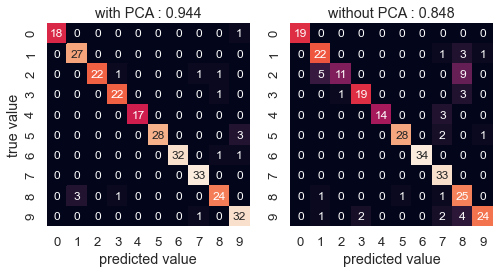

In [ ]:
# Compute the confusion matrix...
mat_p = confusion_matrix(yp2, pred_p)
mat_n = confusion_matrix(yn2, pred_n)
output = 10

# Plot the confusion matrix with heatmap...
plt.figure(1, figsize=(8, 4))

plt.subplot(121)
sns.heatmap(mat_p, square=True, annot=True, 
            annot_kws={"size": 12}, cbar=False)
plt.title('with PCA : {:.3f}'.format(accuracy_score(yp2, pred_p)))
plt.xlim(0, output)
plt.ylim(output, 0)
plt.xlabel('predicted value')
plt.ylabel('true value')

plt.subplot(122)
sns.heatmap(mat_n, square=True, annot=True, 
            annot_kws={"size": 12}, cbar=False)
plt.title('without PCA : {:.3f}'.format(accuracy_score(yn2, pred_n)))
plt.xlim(0, output)
plt.ylim(output, 0)
plt.xlabel('predicted value')
plt.show()

---------------------
**< Summary > :** 
+ It's obvious that, with dimensionality reduction, the accuracy of classification model (i.e., `GaussianNB`) is increased almost 10% for the digit-recognition dataset.
---------------------